In [1]:
import pandas as pd

# Load the prediction results CSV file
# file_path = '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/eval_results/4090-frame_1-5-combined-batchsize-128/test_predictions.csv'
# file_path = '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/eval_results/4090-frame_1-5-combined-batchsize-128-affine-aug-batchsize-128/test_predictions.csv'
file_path = '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/eval_results/resnet50-frame_all-combined/test_predictions.csv'
# file_path = '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/eval_results/resnet50-frame_all-mask/test_predictions.csv'
df_predictions = pd.read_csv(file_path)

# Display basic information and the first few rows of the DataFrame
df_info = df_predictions.info()
df_head = df_predictions.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78315 entries, 0 to 78314
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   path               78315 non-null  object
 1   label_index        78315 non-null  int64 
 2   padding_pixels     78315 non-null  int64 
 3   frame_type         78315 non-null  object
 4   src_dir            78315 non-null  object
 5   track_id           78315 non-null  int64 
 6   start_time         78315 non-null  int64 
 7   end_time           78315 non-null  int64 
 8   first_sc_id        78315 non-null  object
 9   mitosis_traj_type  78315 non-null  object
 10  split              78315 non-null  object
 11  img_path           78315 non-null  object
 12  frame_idx          78315 non-null  int64 
 13  predictions        78315 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 8.4+ MB


(None,
                                     path  label_index  padding_pixels  \
 0  test_mitosis_0_combined_padding-1.mp4            0               1   
 1  test_mitosis_0_combined_padding-1.mp4            0               1   
 2  test_mitosis_0_combined_padding-1.mp4            0               1   
 3  test_mitosis_0_combined_padding-1.mp4            0               1   
 4  test_mitosis_0_combined_padding-1.mp4            0               1   
 
   frame_type                                            src_dir  track_id  \
 0   combined  ../datasets/mitosis-annotations-2023/Gaohan_ti...        -1   
 1   combined  ../datasets/mitosis-annotations-2023/Gaohan_ti...        -1   
 2   combined  ../datasets/mitosis-annotations-2023/Gaohan_ti...        -1   
 3   combined  ../datasets/mitosis-annotations-2023/Gaohan_ti...        -1   
 4   combined  ../datasets/mitosis-annotations-2023/Gaohan_ti...        -1   
 
    start_time  end_time                           first_sc_id  \
 0         

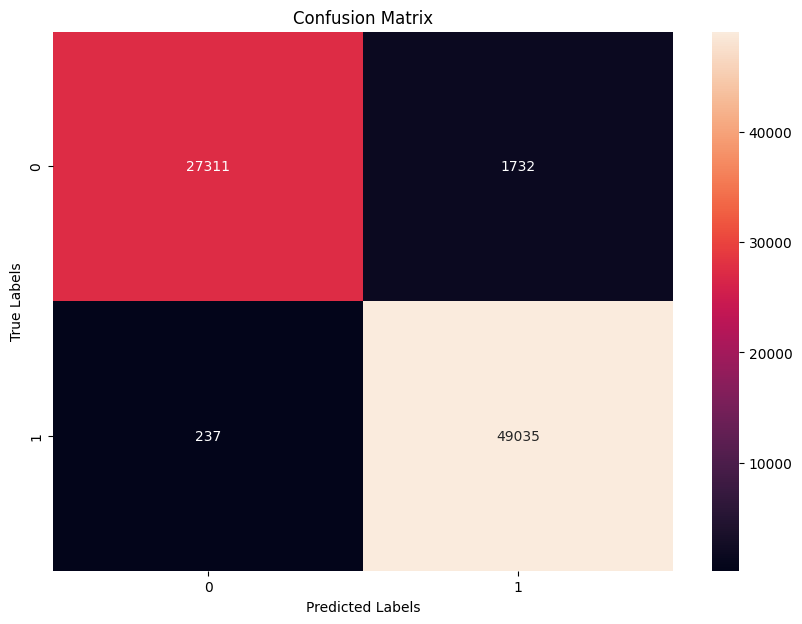

(0.9748579454766009,
 array([[27311,  1732],
        [  237, 49035]]))

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the overall accuracy
accuracy = accuracy_score(df_predictions['label_index'], df_predictions['predictions'])

# Calculate the confusion matrix
conf_matrix = confusion_matrix(df_predictions['label_index'], df_predictions['predictions'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

accuracy, conf_matrix



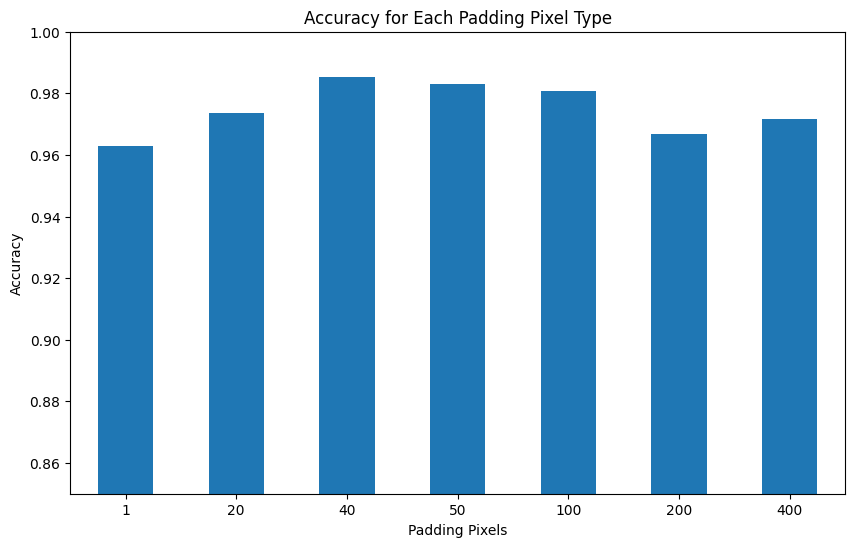

({0: 0.940364287435871, 2: 0.9951899659035558},
 0.9677771266697134,
 padding_pixels
 1      0.963043
 20     0.973548
 40     0.985165
 50     0.983021
 100    0.980608
 200    0.966935
 400    0.971671
 dtype: float64)

In [10]:
import numpy as np

# Function to calculate per-class accuracy
def per_class_accuracy(df, class_label):
    correct_predictions = df[df['label_index'] == class_label]['predictions'] == class_label
    total = df[df['label_index'] == class_label].shape[0]
    accuracy = np.sum(correct_predictions) / total
    return accuracy

# Calculating per-class accuracies
classes = df_predictions['label_index'].unique()
class_accuracies = {class_label: per_class_accuracy(df_predictions, class_label) for class_label in classes}

# Calculating overall accuracy again for confirmation
overall_accuracy = np.mean(list(class_accuracies.values()))

# Analyzing accuracies based on padding pixels
padding_accuracies = df_predictions.groupby('padding_pixels').apply(lambda x: accuracy_score(x['label_index'], x['predictions']))

# Visualizing the accuracy per padding pixel type
plt.figure(figsize=(10, 6))
padding_accuracies.plot(kind='bar')
plt.title('Accuracy for Each Padding Pixel Type')
plt.xlabel('Padding Pixels')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1)
plt.xticks(rotation=0)
plt.show()

class_accuracies, overall_accuracy, padding_accuracies

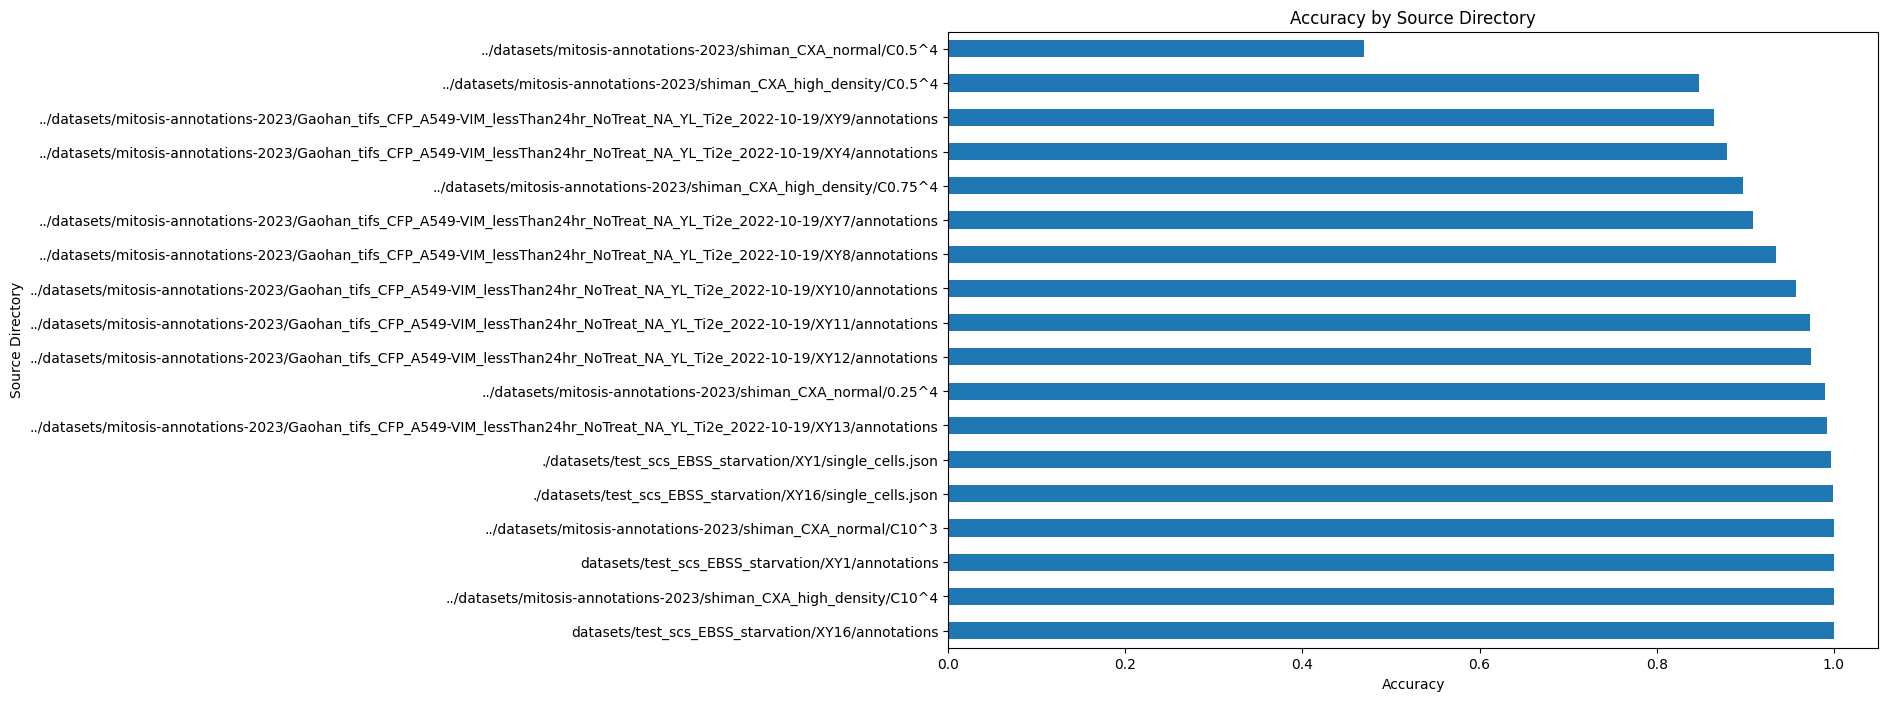

src_dir
datasets/test_scs_EBSS_starvation/XY16/annotations                                                                           1.000000
../datasets/mitosis-annotations-2023/shiman_CXA_high_density/C10^4                                                           1.000000
datasets/test_scs_EBSS_starvation/XY1/annotations                                                                            1.000000
../datasets/mitosis-annotations-2023/shiman_CXA_normal/C10^3                                                                 1.000000
./datasets/test_scs_EBSS_starvation/XY16/single_cells.json                                                                   0.999006
./datasets/test_scs_EBSS_starvation/XY1/single_cells.json                                                                    0.997040
../datasets/mitosis-annotations-2023/Gaohan_tifs_CFP_A549-VIM_lessThan24hr_NoTreat_NA_YL_Ti2e_2022-10-19/XY13/annotations    0.992674
../datasets/mitosis-annotations-2023/shiman_CXA_normal

In [4]:
# Group by 'src_dir' to calculate accuracy for each source directory
src_dir_accuracies = df_predictions.groupby('src_dir').apply(
    lambda x: accuracy_score(x['label_index'], x['predictions'])
)

# Sorting the accuracies for better visualization
src_dir_accuracies_sorted = src_dir_accuracies.sort_values(ascending=False)

# Visualizing the accuracy per source directory
plt.figure(figsize=(12, 8))
src_dir_accuracies_sorted.plot(kind='barh')
plt.title('Accuracy by Source Directory')
plt.xlabel('Accuracy')
plt.ylabel('Source Directory')
plt.show()

src_dir_accuracies_sorted



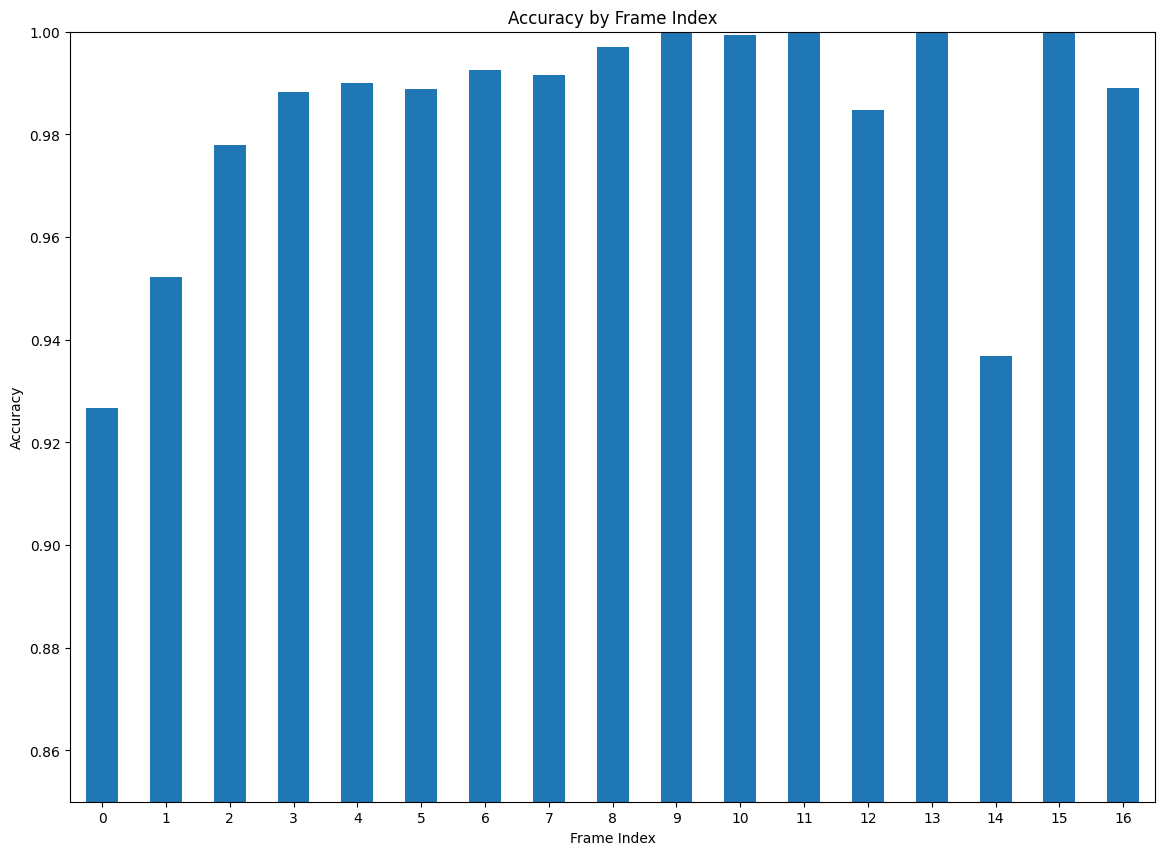

frame_idx
0     0.926631
1     0.952246
2     0.977953
3     0.988239
4     0.989956
5     0.988906
6     0.992499
7     0.991597
8     0.997073
9     1.000000
10    0.999316
11    1.000000
12    0.984694
13    1.000000
14    0.936877
15    1.000000
16    0.989011
dtype: float64

In [11]:
# No need to sort as groupby will maintain the order
frame_idx_accuracies = df_predictions.groupby('frame_idx').apply(
    lambda x: accuracy_score(x['label_index'], x['predictions'])
)

# Visualizing the accuracy per frame index
plt.figure(figsize=(14, 10))
frame_idx_accuracies.plot(kind='bar')
plt.title('Accuracy by Frame Index')
plt.xlabel('Frame Index')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1)
plt.xticks(rotation=0)  # To display all x-tick labels correctly
plt.show()

frame_idx_accuracies



frame_idx
0     10931
1     10931
2     10931
3      9608
4      8264
5      7301
6      5999
7      4522
8      3416
9      1995
10     1463
11     1197
12      784
13      308
14      301
15      182
16      182
Name: count, dtype: int64


<Axes: xlabel='frame_idx'>

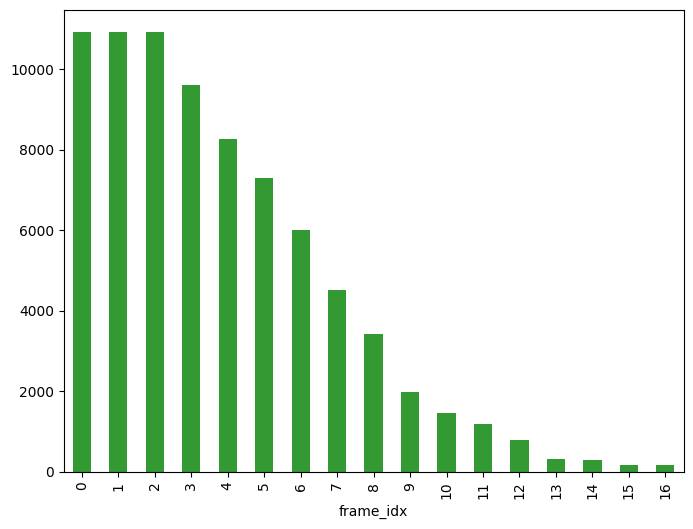

In [26]:
# Check frame_idx distribution
print(df_predictions['frame_idx'].value_counts())

# Draw distribution of frame_idx
plt.figure(figsize=(8, 6))
df_predictions['frame_idx'].value_counts().plot(kind='bar', color='green', alpha=0.8)
# df_predictions['frame_idx'].hist(bins=50, rwidth=0.8, color='green', alpha=0.8)



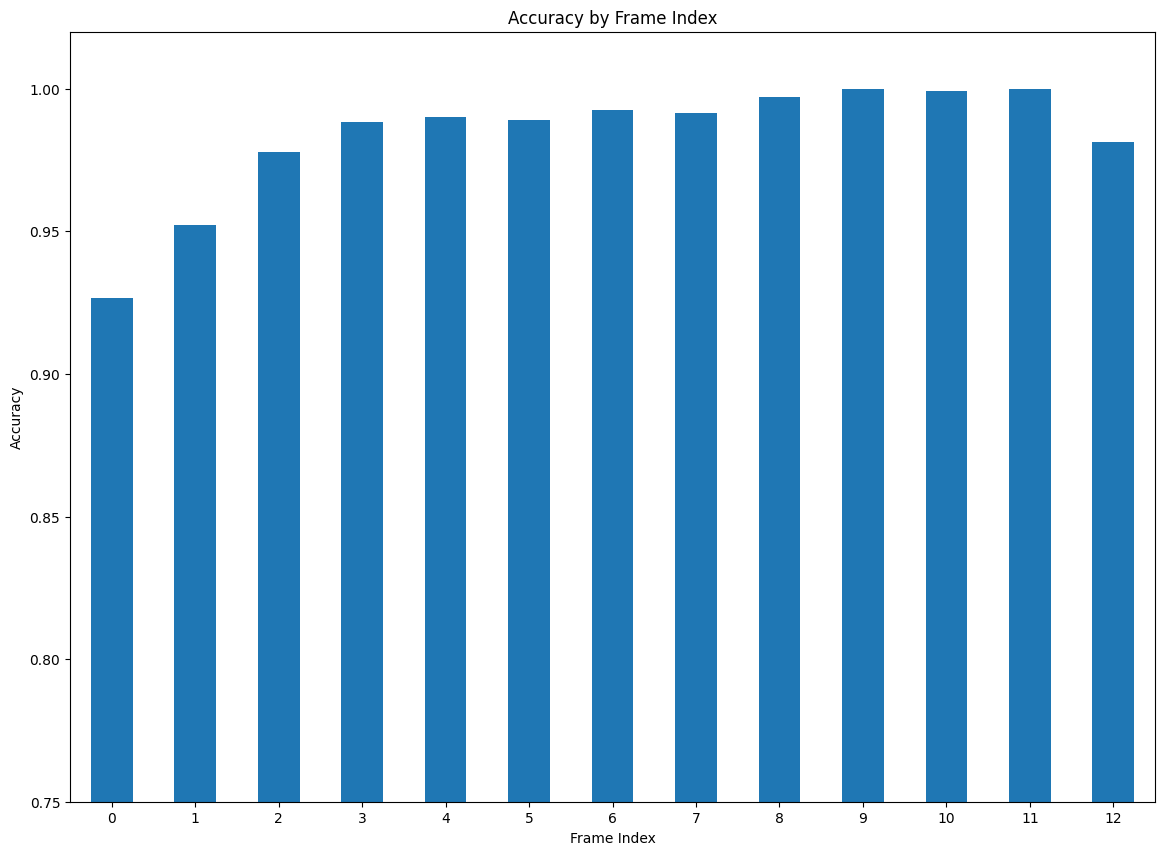

frame_idx_clipped
0     0.926631
1     0.952246
2     0.977953
3     0.988239
4     0.989956
5     0.988906
6     0.992499
7     0.991597
8     0.997073
9     1.000000
10    0.999316
11    1.000000
12    0.981218
dtype: float64

In [6]:
# No need to sort as groupby will maintain the order

clip_max = 12
df_predictions['frame_idx_clipped'] = df_predictions['frame_idx'].apply(lambda x: x if x < clip_max else clip_max)

frame_idx_accuracies = df_predictions.groupby('frame_idx_clipped').apply(
    lambda x: accuracy_score(x['label_index'], x['predictions'])
)

# Visualizing the accuracy per frame index
plt.figure(figsize=(14, 10))
frame_idx_accuracies.plot(kind='bar')
plt.title('Accuracy by Frame Index')
plt.xlabel('Frame Index')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)  # To display all x-tick labels correctly

# y range 0.8 to 1.0
plt.ylim(0.75, 1.02)

plt.show()

frame_idx_accuracies



In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def calc_acc(df_predictions):
    # Calculate the overall accuracy
    accuracy = accuracy_score(df_predictions['label_index'], df_predictions['predictions'])

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(df_predictions['label_index'], df_predictions['predictions'])

    # # Plotting the confusion matrix
    # plt.figure(figsize=(10, 7))
    # sns.heatmap(conf_matrix, annot=True, fmt='g')
    # plt.title('Confusion Matrix')
    # plt.xlabel('Predicted Labels')
    # plt.ylabel('True Labels')
    # plt.show()

    return accuracy

end = 8
for start in range(0 ,5):
    indexer = df_predictions['frame_idx'] >= start
    indexer &= df_predictions['frame_idx'] <= end

    print("accuracy on [{}, {}]:".format(start, end), calc_acc(df_predictions[indexer]))



accuracy on [0, 8]: 0.9730887445586415
accuracy on [1, 8]: 0.9814176999278357
accuracy on [2, 8]: 0.9877900121900042
accuracy on [3, 8]: 0.9905395039631808
accuracy on [4, 8]: 0.9912887261880551
